In [1]:
import argparse
import os
import sys
sys.path.append('C:/Users/arive/pipelinev2')
import matplotlib.pyplot as plt
import cv2
from PIL import Image,ImageDraw

In [2]:
from config.options import Options

from data.dataset import OCRDatasetInstanceSeg
from XML.createXML import XMLData

Unet not supported
Detectron2 not supported
Kraken not supported


In [3]:
cfgfile = "C:/Users/arive/config/config_line.ini"
#cfgfile = "/users/vesalaia/config/config_mask_line.ini"
opts =  Options(cfgfile)

In [4]:
opts.region_classes

{'background': 0, 'content': 1, 'line': 2, 'unknown': 3}

In [5]:
dataset_files = [
    ["C:/Users/arive/Datasets/Muutot/sample_all_printed", 
     "C:/Users/arive/Datasets/Muutot/sample_all_printed/page"]]

dataset = OCRDatasetInstanceSeg(dataset_files, opts.region_classes)

In [6]:
dataset.__len__()

50

In [7]:
from model.inference import load_region_model, load_line_model, load_text_recognize_model

In [8]:
page = dataset.__getXMLitem__(15) 

TableRegion t
TableRegion t_3264
TableRegion t_3338
TableRegion t_3574
TableRegion t_76
TableRegion t_334


In [9]:
page

{'metadata': {'creator': 'Transkribus',
  'created': '2024-06-07T10:50:34.244+02:00',
  'updated': '2024-06-10T12:39:34.021+02:00'},
 'reading_order': {},
 'size': (1721, 2200),
 'regions': [{'regiontype': 'TableRegion',
   'id': 't',
   'polygon': array([[  69,   95],
          [1061,   95],
          [1061,  257],
          [  69,  257]]),
   'rows': 1,
   'columns': 1,
   'table': [{'id': 'c',
     'row': 0,
     'col': 0,
     'polygon': array([[  69,   95],
            [  69,  257],
            [1061,  257],
            [1061,   95]]),
     'lines': []}]},
  {'regiontype': 'TableRegion',
   'id': 't_3264',
   'polygon': array([[1106,  105],
          [2074,  105],
          [2074,  245],
          [1106,  245]]),
   'rows': 1,
   'columns': 1,
   'table': [{'id': 'c_3265',
     'row': 0,
     'col': 0,
     'polygon': array([[1106,  105],
            [1106,  245],
            [2074,  245],
            [2074,  105]]),
     'lines': []}]},
  {'regiontype': 'TableRegion',
   'id': 't

In [10]:
len(page['regions']) ##


6

In [23]:
def plot_page_with_regions(image_path, page):
    # Read the image
    thickness = 5
    point_radius = 8
    cell_colour = (255, 0, 0)
    image = cv2.imread(image_path)
    
    if image is None:
        raise ValueError(f"Image not found at the path: {image_path}")
    
    # Convert vertices to a numpy array
#    print(len(page['regions']),page['regions'])
    for reg in page['regions']:
        if reg['regiontype'] == "TableRegion":
            region_colour = (0, 0, 255)
        elif reg['regiontype'] == "TextRegion":
            region_colour = (0, 255, 0)
        
        for cell in reg['table']:
            xmax, ymax = cell['polygon'].max(axis=0)
            xmin, ymin = cell['polygon'].min(axis=0)
            cell_left_top = (xmin, ymin)
            cell_left_bottom = (xmin, ymax)
            cell_right_top = (xmax, ymin)
            cell_right_bottom = (xmax, ymax)
            cv2.circle(image, cell_left_top, radius=point_radius, color=cell_colour)            
            cv2.circle(image, cell_left_bottom, radius=point_radius, color=cell_colour)            
            cv2.circle(image, cell_right_top, radius=point_radius, color=cell_colour)            
            cv2.circle(image, cell_right_bottom, radius=point_radius, color=cell_colour)            
        pts = reg['polygon']
        cv2.polylines(image, [pts], isClosed=True, color=region_colour, thickness=thickness)
            
    # Convert BGR to RGB for displaying with matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Plot the image
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide axis
    plt.show()


TableRegion t
TableRegion t_3264
TableRegion t_3338
TableRegion t_3574
TableRegion t_76
TableRegion t_334


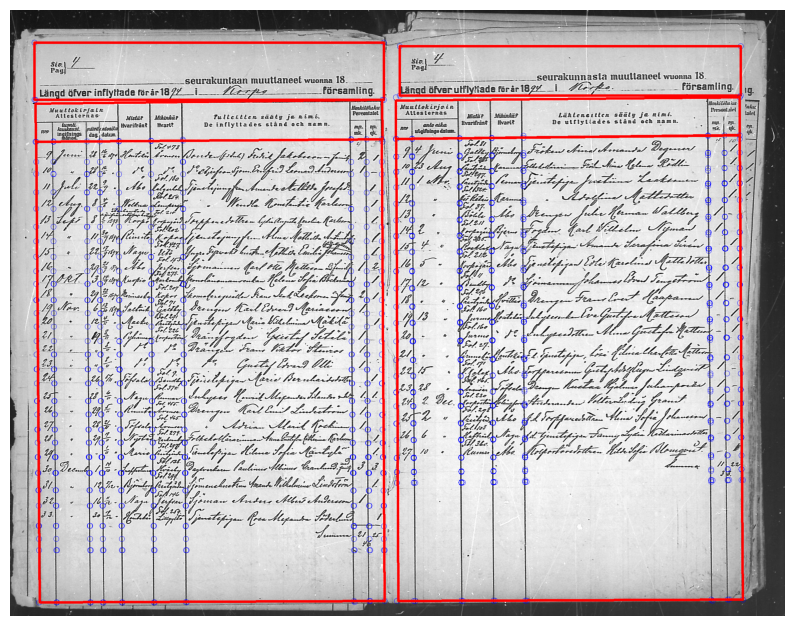

In [24]:
idx = 15
image_path = dataset.__getfullname__(idx)
page = dataset.__getXMLitem__(idx)
plot_page_with_regions(image_path, page)